In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [ ]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
X_valid.shape, X_train.shape, y_valid.shape, y_train.shape

((5000, 28, 28), (55000, 28, 28), (5000,), (55000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import regularizers

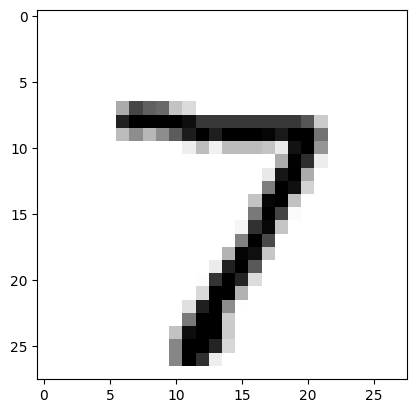

In [ ]:
plt.imshow(X_test[0], cmap="binary")

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28,28), name = "inputLayer"))
model.add(Dense(units=64, activation= "relu", kernel_initializer = tf.keras.initializers.HeNormal(seed=None)))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation = "relu", kernel_initializer = tf.keras.initializers.HeUniform(seed=None)))
model.add(Dropout(0.1))
model.add(Dense(units=16, activation = "tanh", kernel_initializer = tf.keras.initializers.GlorotNormal(seed=None)))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)               

In [ ]:
lossFunction = "sparse_categorical_crossentropy"
optimizer = "SGD"
sgd = tf.keras.optimizers.SGD(
    learning_rate = 0.01,
    momentum = 0
)
metrics = ["accuracy"]

model.compile(loss=lossFunction, optimizer= optimizer , metrics = metrics)

In [ ]:
epochs = 5
validation_set = (X_valid,y_valid)
model.fit(X_train,y_train,validation_data= validation_set, epochs = epochs, batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 1.1374 - accuracy: 0.6512 - val_loss: 0.4877 - val_accuracy: 0.8798
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5786 - accuracy: 0.8369 - val_loss: 0.3149 - val_accuracy: 0.9152
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4374 - accuracy: 0.8799 - val_loss: 0.2475 - val_accuracy: 0.9314
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3714 - accuracy: 0.8986 - val_loss: 0.2111 - val_accuracy: 0.9408
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3289 - accuracy: 0.9101 - val_loss: 0.1907 - val_accuracy: 0.9458
